In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
%matplotlib inline

In [2]:
ht = pd.read_csv('hypothyroid data.csv', header=None)

Change column names

In [3]:
ht.columns=['hypothyroid','age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthryoid','pregnant','sick','tumor','lithium','goiter','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG']

In [4]:
print(ht.columns)

Index(['hypothyroid', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthryoid', 'pregnant', 'sick', 'tumor', 'lithium', 'goiter',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')


Possible interesting data to visualize:<br/>
''Hypothyroid levels of TSH, TT4, and T3 vs 'negative'<br/>
''dispurstion of hypothyroid among the sexes<br/>
levels of TSH, TT4 and T3 within hypothyroid patients when on thyroxine vs not<br/>

Replace empty values with 'NA' and add zeroes to the front of integers and floats for correct sorting

In [5]:
ht = ht.replace('?', None)

Convert Strings to ints and floats

In [7]:
for index, age in enumerate(ht['age']):
    ht['age'][index] = int(age)
        
for index, T3 in enumerate(ht['T3']):
    ht['T3'][index] = float(T3)
            
for index, TSH in enumerate(ht['TSH']):
    
    ht['TSH'][index] = float(TSH)

            
for index, TT4 in enumerate(ht['TT4']):
    ht['TT4'][index] = float(TT4)

Briefly describe the data for a quick overview

In [62]:
ht.describe()

,hypothyroid,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthryoid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163.0,3163,3163.0,3163,3163,3163,3163,3163,3163
unique,2,92,2,2,2,2,2,2,2,2,...,2,69.0,2,268.0,2,158,2,280,2,53
top,negative,59,F,f,f,f,f,f,f,f,...,y,2.1,y,98.0,y,0.98,y,98,n,23
freq,3012,84,2234,2702,3108,3121,3059,2922,2920,3100,...,2468,189.0,2914,51.0,2915,91,2916,63,2903,282


Change figure size to make numbers on axes readable

In [8]:
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)

[6.0, 4.0]


In [9]:
fig_size[0]=25
fig_size[1]=16
plt.rcParams["figure.figsize"] = fig_size

My attempts at a histogram failed. I could not figure out why the operation would get stuck or hung up unless it used a sorted list of strings.  I need to data to be ints for other graphs, so my next best solution was to create a bar graph with each unique value on the x-axis and a count of that value as it's height.

In [58]:
#get rid of None values in list

#ageList = []
#for index, age in enumerate(ht['age']):
#    if age != None
#        ageList.append(ht['age'][index])

#plt.hist(ht['age'].sort_values(), bins=[0,10,20,30,40,50,60,70,80,90,100]) 
#plt.hist(ht['age'].loc[ht['hypothyroid'].isin(['hypothyroid'])], bins = 10)
#plt.hist(ht['age'].loc[ht['hypothyroid'].isin(['negative'])], bins=[0,10,20,30,40,50,60,70,80,90,100], color='orange', alpha=.5)

In [59]:
print(np.unique(ht['age']))
print(ht['age'].value_counts(sort=False))

[1 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77
 78 79 80 81 82 83 84 85 86 87 88 89 90 92 93 97 98]
1      4
4      1
5      1
6      2
7      1
8      2
9      3
10     2
11     4
12     8
13     8
14    10
15    23
16    20
17    28
18    28
19    22
20    28
21    23
22    29
23    27
24    53
25    27
26    41
27    53
28    71
29    41
30    45
31    36
32    49
      ..
65    49
66    45
67    42
68    55
69    42
70    67
71    56
72    72
73    62
74    46
75    38
76    47
77    44
78    49
79    34
80    30
81    12
82    16
83    12
84    26
85    24
86    14
87    12
88     4
89     4
90     1
92     2
93     1
97     1
98     2
Name: age, Length: 92, dtype: int64


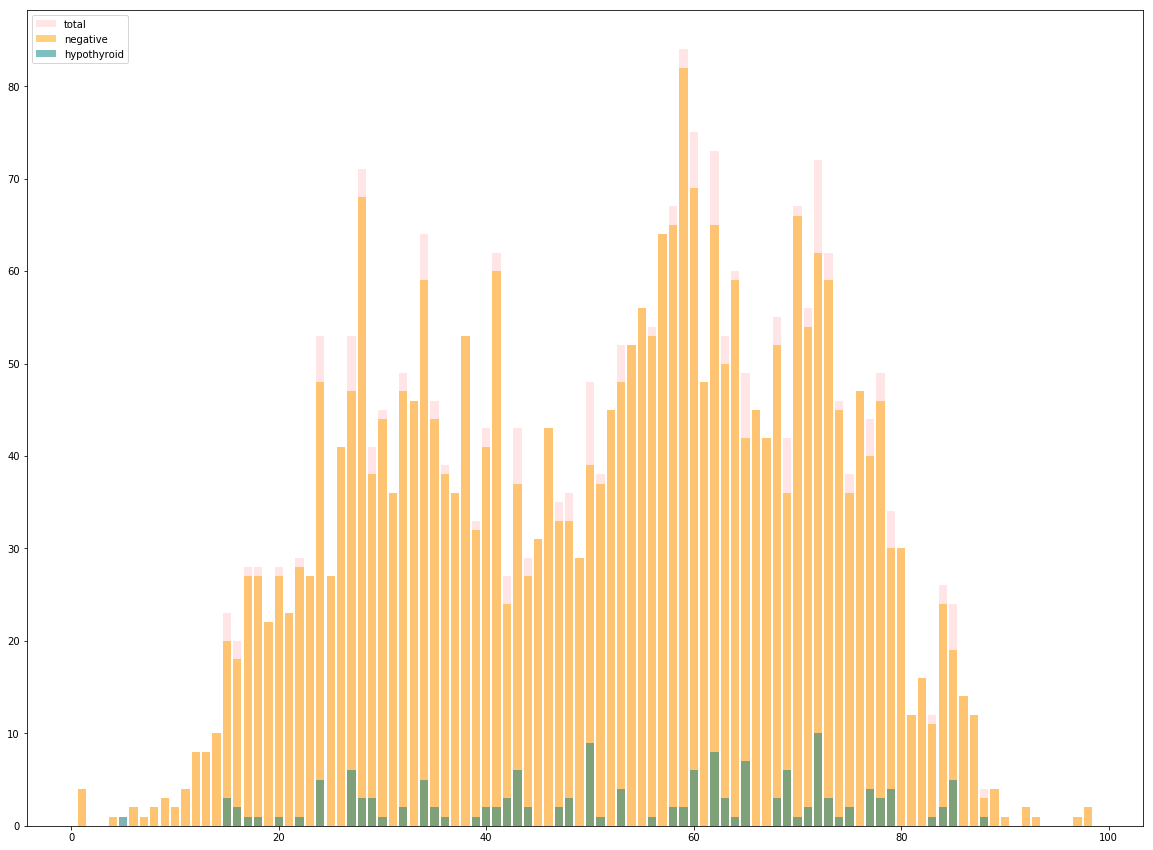

In [183]:

plt.bar(x=np.unique(ht['age']),
        height=ht['age'].value_counts(sort=False), 
        color='red', alpha=.1, label='total')
plt.bar(x=np.unique(ht['age'].loc[ht['hypothyroid'].isin(['negative'])]),
        height=ht['age'].loc[ht['hypothyroid'].isin(['negative'])].value_counts(sort=False), 
        color='orange', alpha=.5, label='negative')
plt.bar(x=np.unique(ht['age'].loc[ht['hypothyroid'].isin(['hypothyroid'])]),
        height=ht['age'].loc[ht['hypothyroid'].isin(['hypothyroid'])].value_counts(sort=False), 
        color='teal',alpha=.5, label='hypothyroid')

plt.legend(loc='upper left')

The groups are not equally represented with a large n for 'negative' and a relatively small n for 'hypothyroid'

Scatter plots to visual spread of data by age

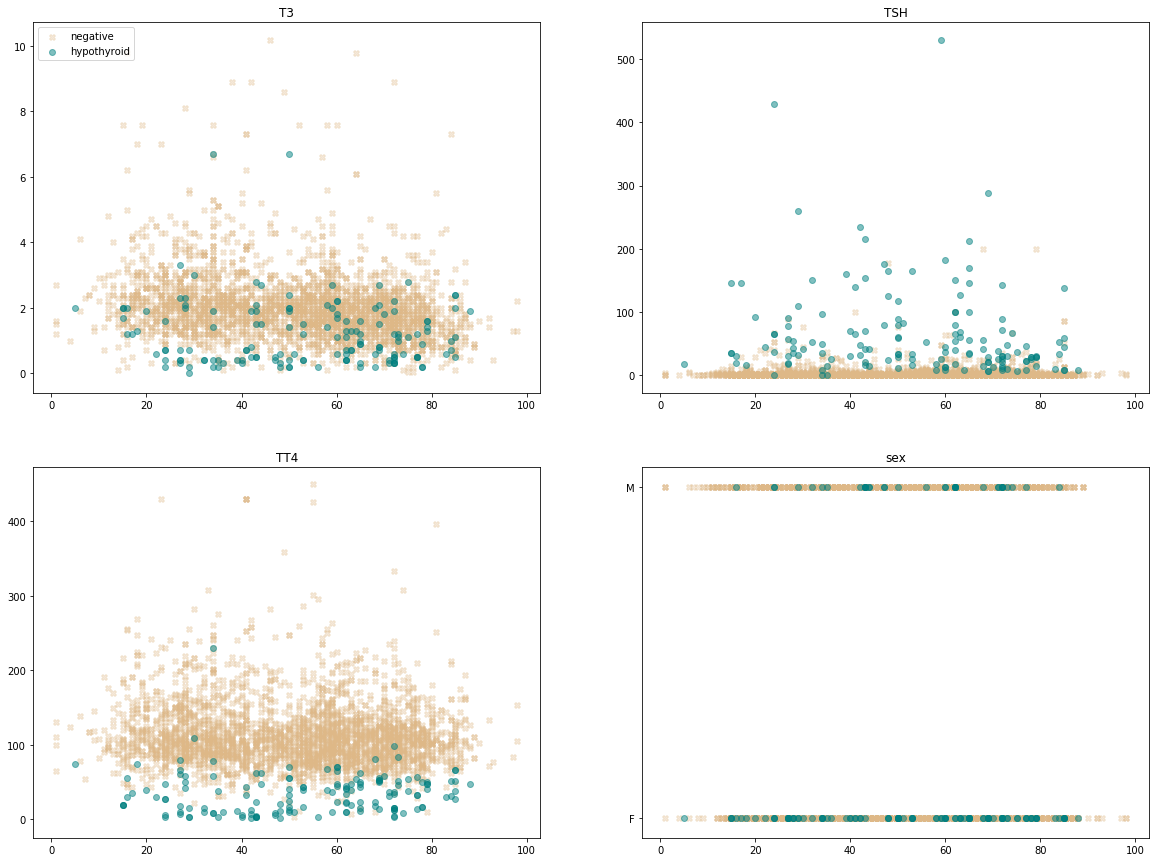

<Figure size 2160x2160 with 0 Axes>

In [154]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(30, 30))


axarr[0,0].scatter(ht['age'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['T3'].loc[ht['hypothyroid'].isin(['negative'])],
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[0,0].scatter(ht['age'].loc[ht['hypothyroid'].isin(['hypothyroid'])], 
                   ht['T3'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   c='teal', alpha=.5, label='hypothyroid')


#axarr[0,0].xlabel('age')
#axarr[0,0].ylabel('T3 levels')
axarr[0,0].legend(loc='upper left',prop={'size': 10});
axarr[0,0].set_title('T3')



axarr[0,1].scatter(ht['age'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['TSH'].loc[ht['hypothyroid'].isin(['negative'])], 
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[0,1].scatter(ht['age'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   ht['TSH'].loc[ht['hypothyroid'].isin(['hypothyroid'])], 
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[0,1].xlabel('age')
#axarr[0,1].ylabel('TSH levels')
#axarr[0,1].legend(loc='upper left',prop={'size': 20});
axarr[0,1].set_title('TSH')



axarr[1,0].scatter(ht['age'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['TT4'].loc[ht['hypothyroid'].isin(['negative'])],
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[1,0].scatter(ht['age'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   ht['TT4'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[1,0].xlabel('age')
#axarr[1,0].ylabel('TT4 levels')
#axarr[1,0].legend(loc='upper left',prop={'size': 20});
axarr[1,0].set_title('TT4')


axarr[1,1].scatter(ht['age'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['sex'].loc[ht['hypothyroid'].isin(['negative'])],
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[1,1].scatter(ht['age'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   ht['sex'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[1,1].xlabel('age')
#axarr[1,1].ylabel('sex')
#axarr[1,1].legend(loc='upper left',prop={'size': 5});
axarr[1,1].set_title('sex')

plt.show()

Viewing Hypothyroid conditions over negative conditions.

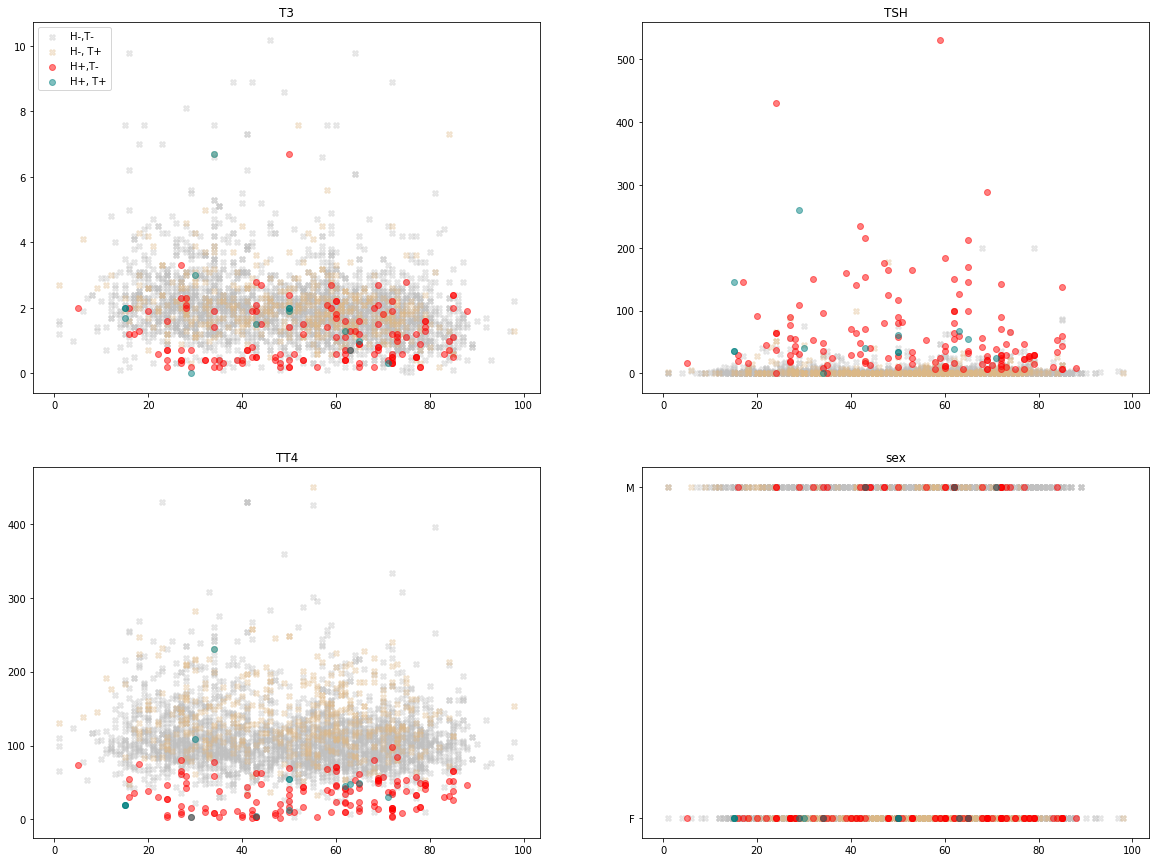

<Figure size 1440x1440 with 0 Axes>

In [177]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(20, 20))


axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='H-,T-', marker='X')
axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='H-, T+', marker='X')
axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='H+,T-')
axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='H+, T+')


#axarr[0,0].xlabel('age')
#axarr[0,0].ylabel('T3 levels')
axarr[0,0].legend(loc='upper left',prop={'size': 10});
axarr[0,0].set_title('T3')



axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='hypothyroid', marker='X')
axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='hypothyroid', marker='X')
axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='hypothyroid')
axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[0,1].xlabel('age')
#axarr[0,1].ylabel('TSH levels')
#axarr[0,1].legend(loc='upper left',prop={'size': 20});
axarr[0,1].set_title('TSH')



axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TT4'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='hypothyroid', marker='X')
axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TT4'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='hypothyroid', marker='X')
axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TT4'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='hypothyroid')
axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TT4'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[1,0].xlabel('age')
#axarr[1,0].ylabel('TT4 levels')
#axarr[1,0].legend(loc='upper left',prop={'size': 20});
axarr[1,0].set_title('TT4')


axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='hypothyroid', marker='X')
axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='hypothyroid', marker='X')
axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='hypothyroid')
axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[1,1].xlabel('age')
#axarr[1,1].ylabel('sex')
#axarr[1,1].legend(loc='upper left',prop={'size': 5});
axarr[1,1].set_title('sex')

plt.show()

Questions:<br/>
-are these measurements pre or post Thyroxine?  If post - how long was each person on thyroxine? (i.e. are these the stable levels after equilibrating the meds?).

Viewing Thyroxine conditions over non-thyroxine conditions.

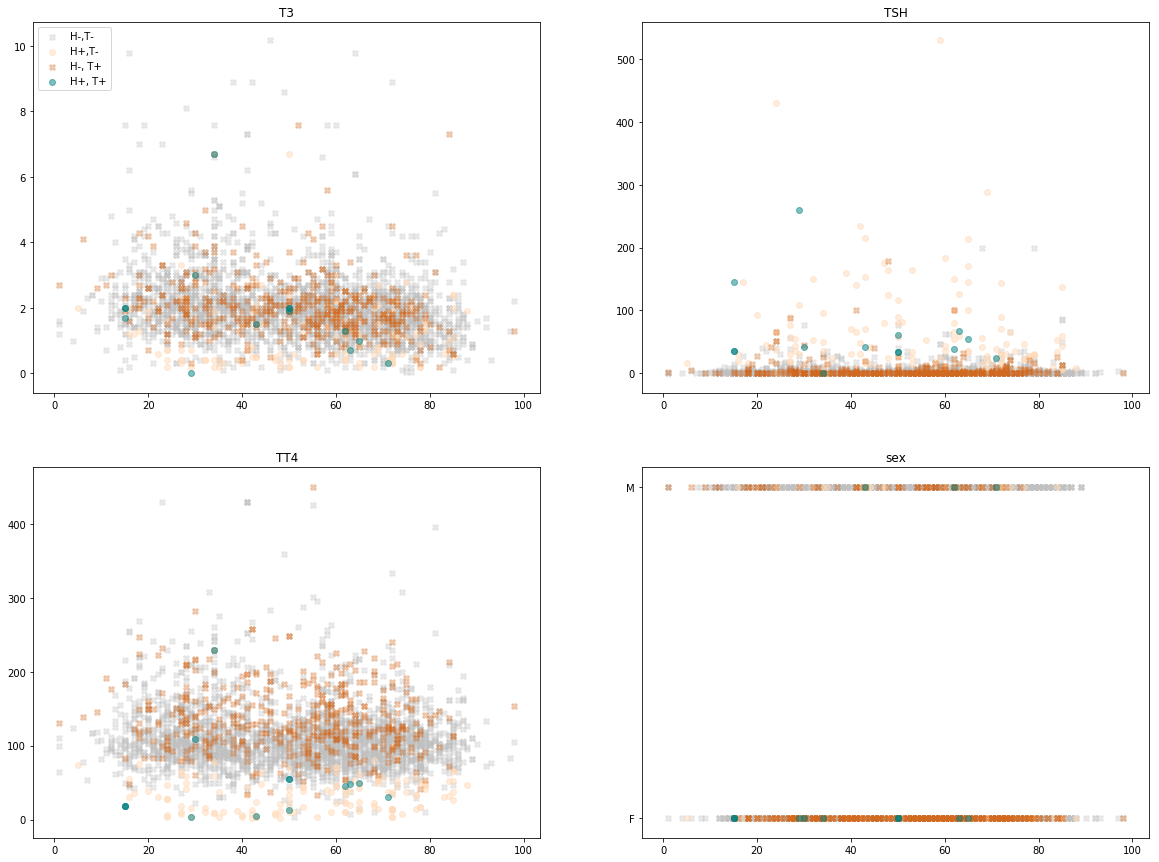

<Figure size 1440x1440 with 0 Axes>

In [191]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(20, 20))


axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='H-,T-', marker='X')
axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='peachpuff', alpha=.5, label='H+,T-')
axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='chocolate', alpha=.3, label='H-, T+', marker='X')
axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='H+, T+')


#axarr[0,0].xlabel('age')
#axarr[0,0].ylabel('T3 levels')
axarr[0,0].legend(loc='upper left',prop={'size': 10});
axarr[0,0].set_title('T3')



axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='hypothyroid', marker='X')
axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='peachpuff', alpha=.5, label='hypothyroid')
axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='chocolate', alpha=.3, label='hypothyroid', marker='X')
axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[0,1].xlabel('age')
#axarr[0,1].ylabel('TSH levels')
#axarr[0,1].legend(loc='upper left',prop={'size': 20});
axarr[0,1].set_title('TSH')



axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TT4'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='hypothyroid', marker='X')
axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TT4'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='peachpuff', alpha=.5, label='hypothyroid')
axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TT4'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='chocolate', alpha=.3, label='hypothyroid', marker='X')
axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TT4'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[1,0].xlabel('age')
#axarr[1,0].ylabel('TT4 levels')
#axarr[1,0].legend(loc='upper left',prop={'size': 20});
axarr[1,0].set_title('TT4')


axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='hypothyroid', marker='X')
axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='peachpuff', alpha=.5, label='hypothyroid')
axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='chocolate', alpha=.3, label='hypothyroid', marker='X')
axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[1,1].xlabel('age')
#axarr[1,1].ylabel('sex')
#axarr[1,1].legend(loc='upper left',prop={'size': 5});
axarr[1,1].set_title('sex')

plt.show()

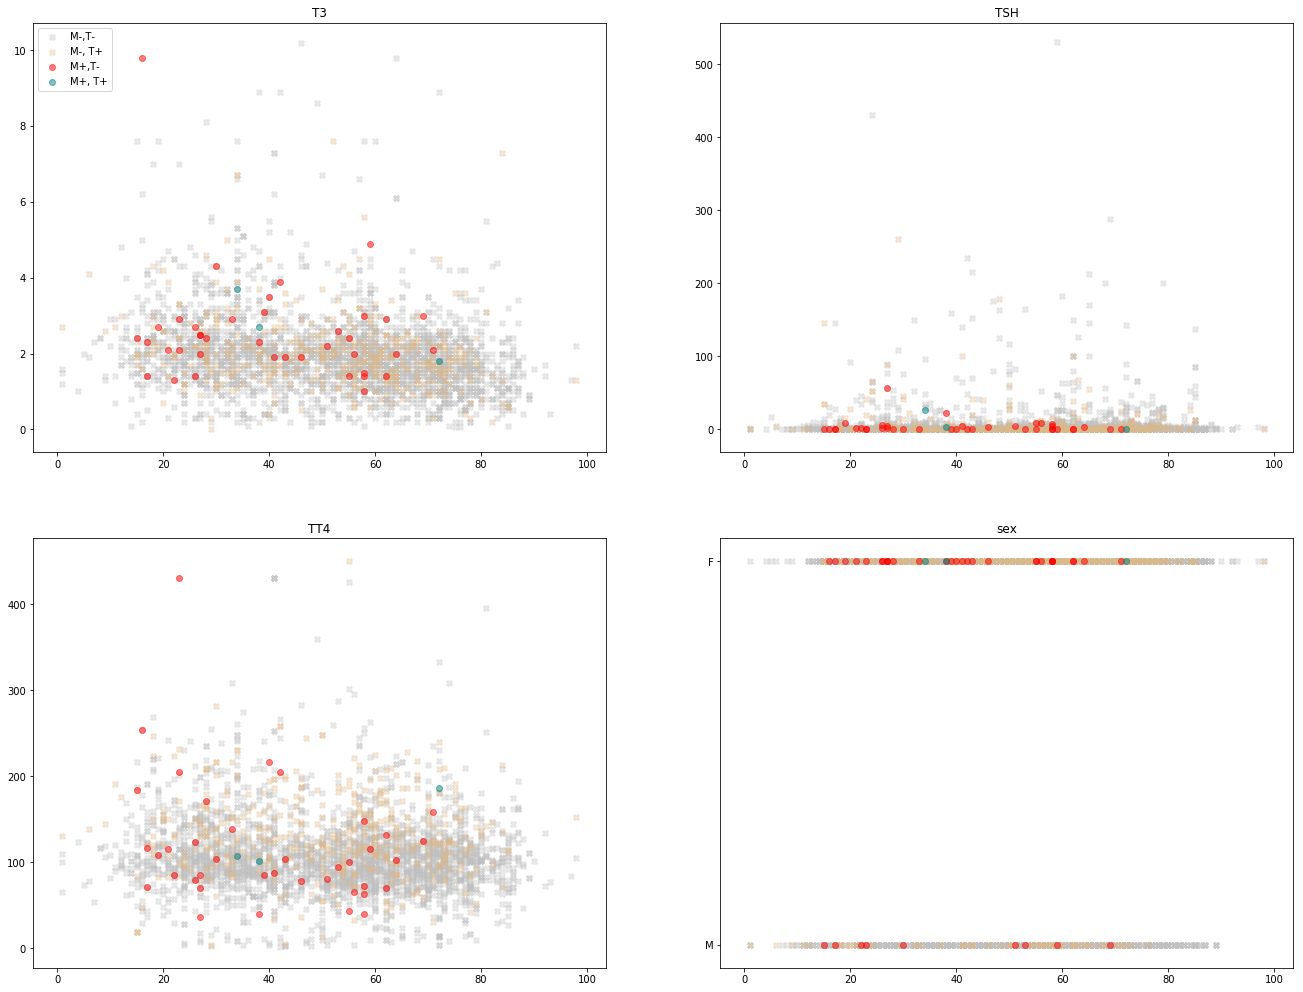

<Figure size 1440x1440 with 0 Axes>

In [206]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(20, 20))


axarr[0,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='M-,T-', marker='X')
axarr[0,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='M-, T+', marker='X')
axarr[0,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='M+,T-')
axarr[0,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='M+, T+')


#axarr[0,0].xlabel('age')
#axarr[0,0].ylabel('T3 levels')
axarr[0,0].legend(loc='upper left',prop={'size': 10});
axarr[0,0].set_title('T3')



axarr[0,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='M-,T-', marker='X')
axarr[0,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='M-, T+', marker='X')
axarr[0,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='M+,T-')
axarr[0,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='M+, T+')

#axarr[0,1].xlabel('age')
#axarr[0,1].ylabel('TSH levels')
#axarr[0,1].legend(loc='upper left',prop={'size': 20});
axarr[0,1].set_title('TSH')



axarr[1,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TT4'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='M-,T-', marker='X')
axarr[1,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TT4'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='M-, T+', marker='X')
axarr[1,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TT4'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='M+,T-')
axarr[1,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TT4'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='M+, T+')

#axarr[1,0].xlabel('age')
#axarr[1,0].ylabel('TT4 levels')
#axarr[1,0].legend(loc='upper left',prop={'size': 20});
axarr[1,0].set_title('TT4')


axarr[1,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='M-,T-', marker='X')
axarr[1,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='M-, T+', marker='X')
axarr[1,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='M+,T-')
axarr[1,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='M+, T+')

#axarr[1,1].xlabel('age')
#axarr[1,1].ylabel('sex')
#axarr[1,1].legend(loc='upper left',prop={'size': 5});
axarr[1,1].set_title('sex')

x.subplots_adjust(top=1, right=1)

plt.show()